<a href="https://www.kaggle.com/code/dayyak/student-performance-multiple-linear-regression?scriptVersionId=189136662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This analysis aims to explore the relationship between students' lifestyles, study techniques, and their performance scores. Based on this relationship, I will develop a model designed to predict student performance and achieve the most accurate results possible.

# Data Analysis and Processing

In [1]:
# Import Python libraries
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


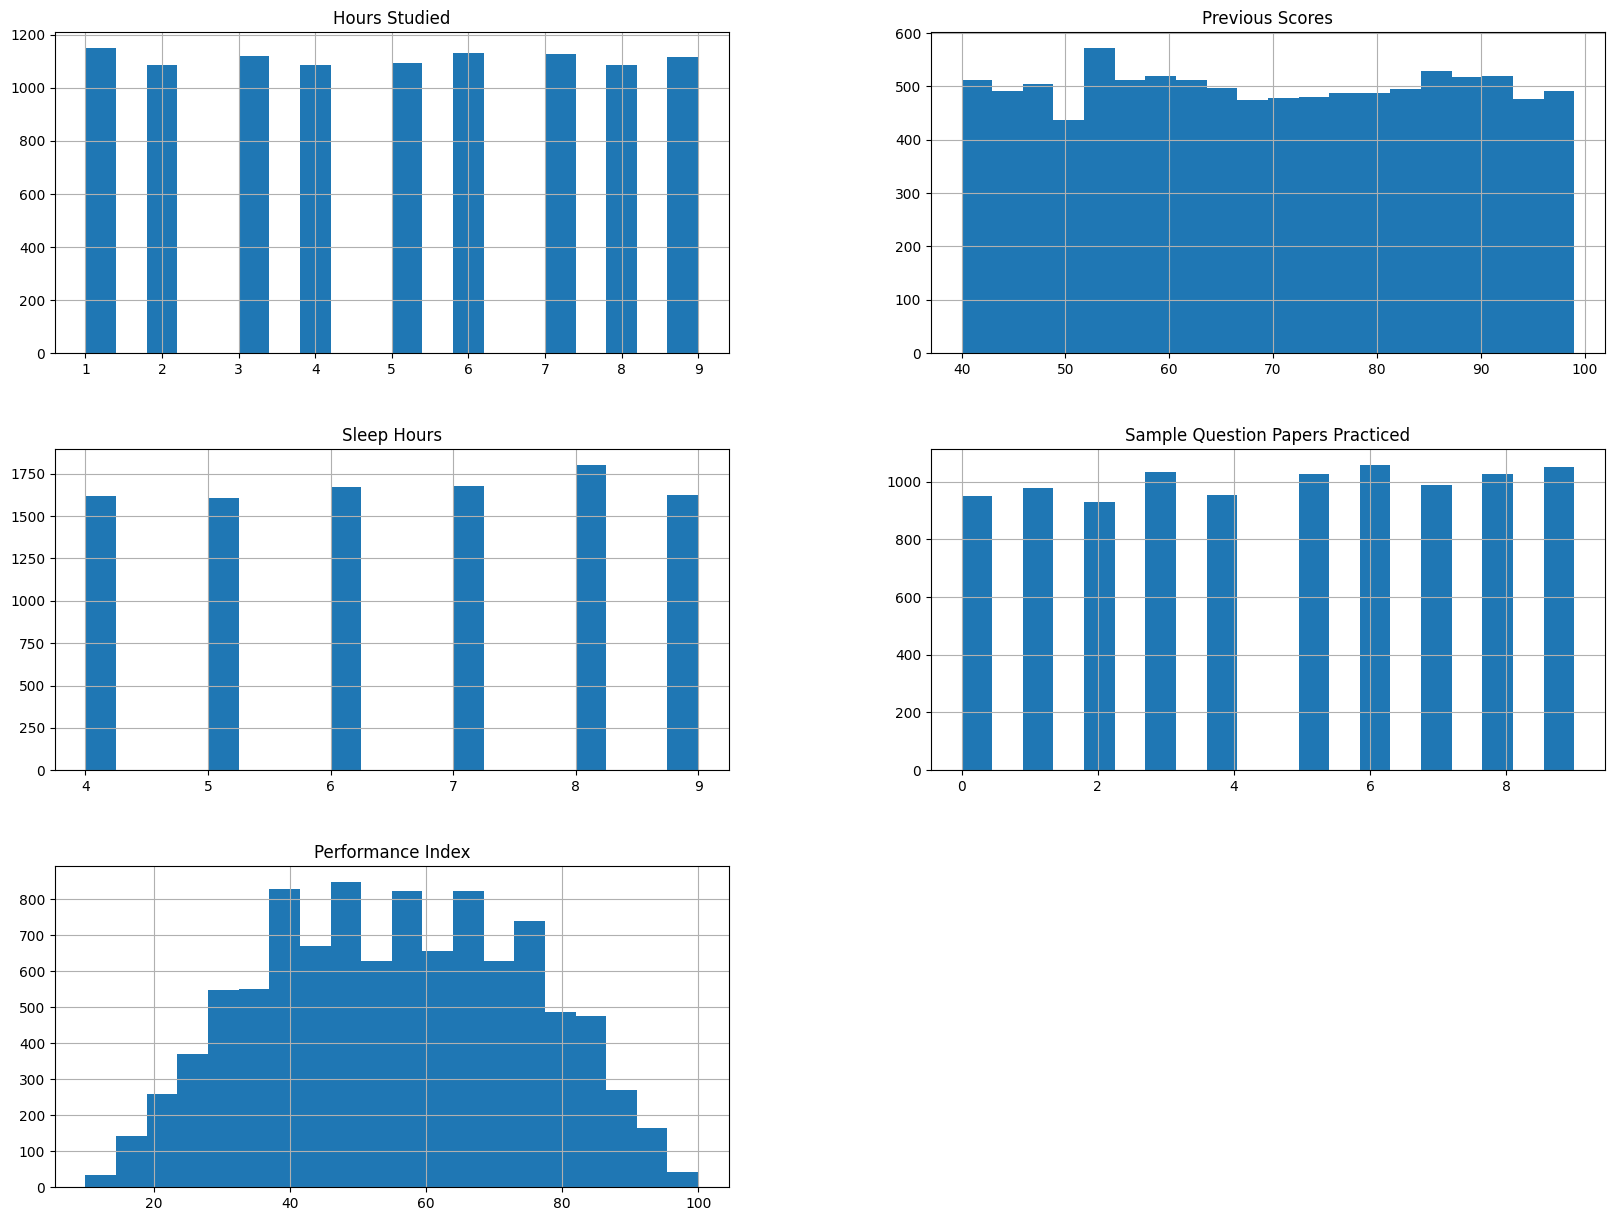

In [5]:
# visualizing the features
df.hist(bins=20, figsize=(20, 15))
plt.show()

After exploring the dataset and examining the distribution of features, I found that the data is almost balanced. Most features are distributed symmetrically with mean values near the center, indicating that the data is well-balanced. The dataset is clean with no missing values, and the features do not require transformation or cleaning. All independent features, except for one, are numeric integers. Based on this analysis, the only necessary preprocessing step is to convert the single categorical column into an integer or boolean format.

**Convert the (Extracurricular Activities) feature into a dummy variable.**

In [6]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

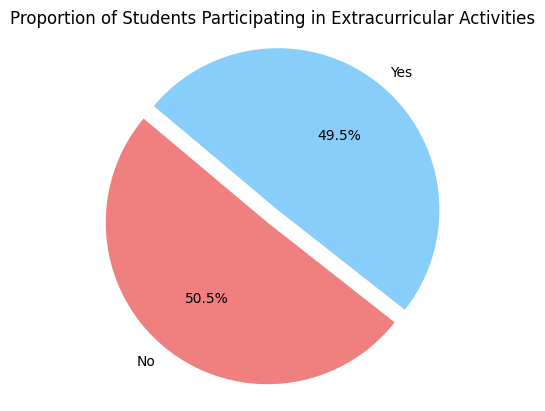

In [7]:
activity_counts = df['Extracurricular Activities'].value_counts()
labels = ['No', 'Yes']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

plt.pie(activity_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Proportion of Students Participating in Extracurricular Activities')
plt.axis('equal')

plt.show()

**Let's determine the correlation between the columns.**

Before calculating correlations, let's visualize the relationship between each feature and the performance feature by creating a box plot for each feature.

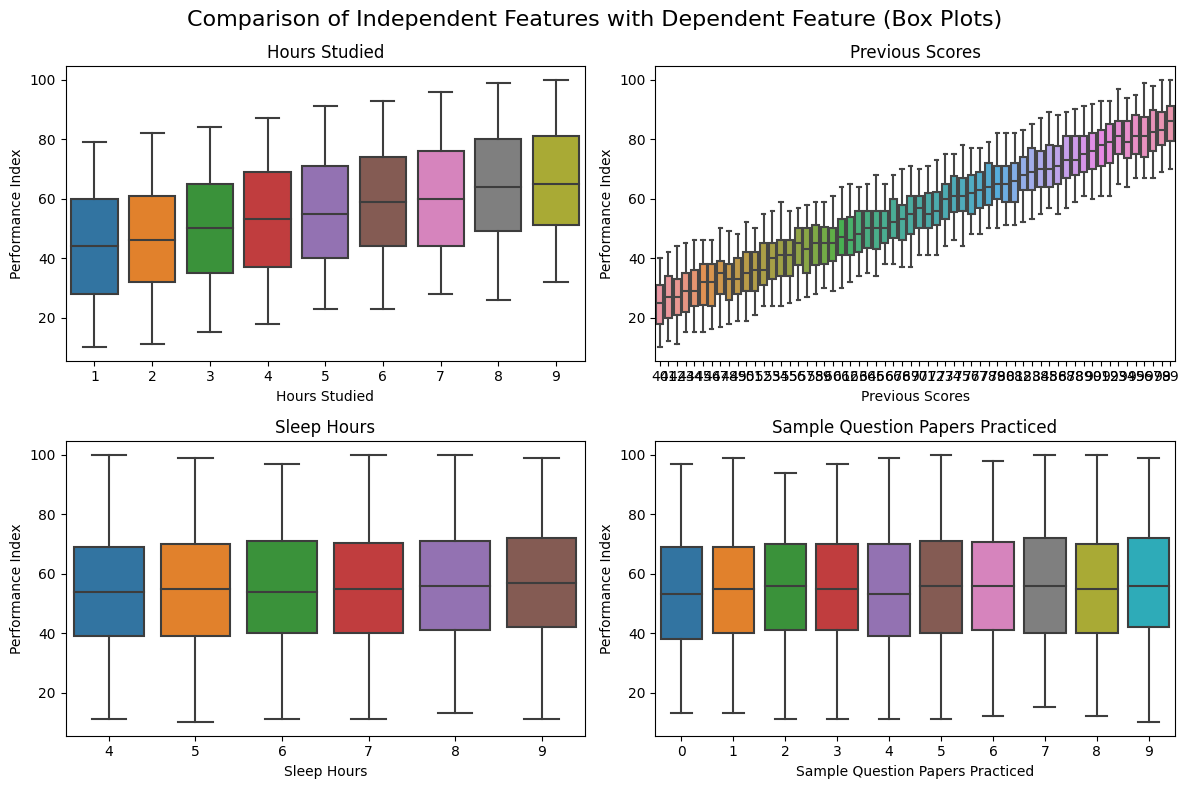

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # 2x2 grid of subplots
fig.suptitle('Comparison of Independent Features with Dependent Feature (Box Plots)', fontsize=16)

# Plotting each subplot
sns.boxplot(x='Hours Studied', y='Performance Index', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Hours Studied')

sns.boxplot(x='Previous Scores', y='Performance Index', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Previous Scores')

sns.boxplot(x='Sleep Hours', y='Performance Index', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Hours')

sns.boxplot(x='Sample Question Papers Practiced', y='Performance Index', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Sample Question Papers Practiced')

plt.tight_layout()
plt.show()

A slight increase in performance is observed in the plot of "Hours Studied", and a more significant increase is seen in the second plot for "Previous Scores". However, no significant effect is apparent in the bottom plots for the features "Sleep Hours" and "Sample Question Papers Practiced". 

*Let's evaluate this using correlation analysis.*

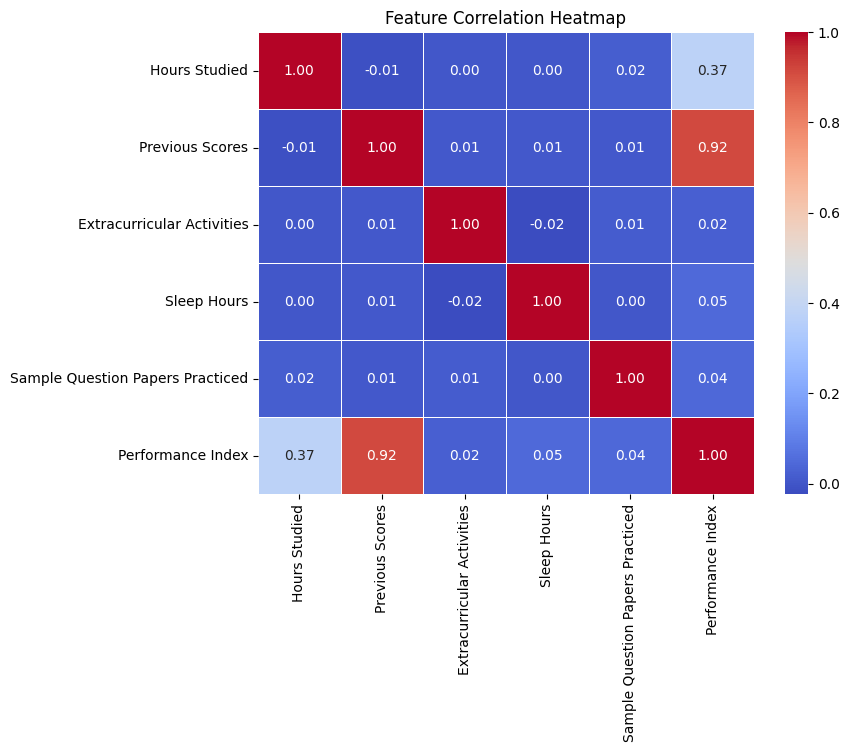

In [9]:
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

A strong positive correlation is observed between student performance and previous scores, and a moderate positive correlation is seen with studying hours. However, no significant relationship is found with other features such as extracurricular activities, sleeping hours, and the number of sample question papers practiced.

# Construct and validate the model

In [10]:
X = df.drop(columns='Performance Index')
y = df['Performance Index']

reg_model = LinearRegression()

cv_scores = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_squared_error')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model.fit(X_train, y_train)

LinearRegression()

I split the data into 80% for training and 20% for testing. Prior to this, I used cross-validation with 10 folds to evaluate the model and took the mean of the results.

# Result

In [11]:
# Evaluate the final model on the test set
print(f'Average MSE from 10-fold cross-validation: {-cv_scores.mean():.2f}')
print(f'Test set R^2 score: {reg_model.score(X_test, y_test):.2f}')

Average MSE from 10-fold cross-validation: 4.15
Test set R^2 score: 0.99


Based on the results obtained, the model demonstrates strong performance across evaluations. The average Mean Squared Error (MSE) from 10-fold cross-validation is 4.15, indicating that the average difference between the actual and predicted values is only 4.15 marks, which is good. Additionally, the model achieves an impressive R² score of 0.99 on the test set, highlighting its capability to accurately explain the variance in the target variable.

*Let's visualize the predicted and actual values of y to see how they align.*

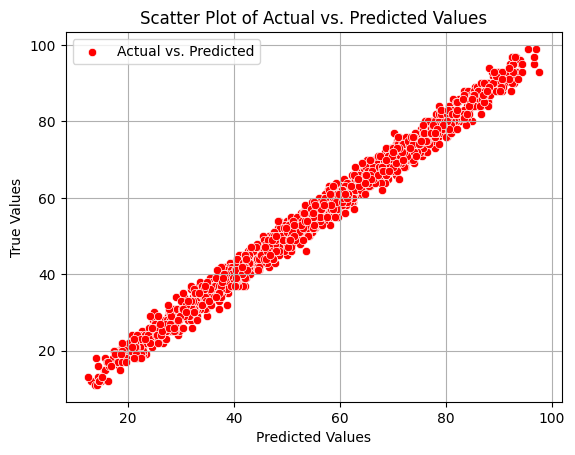

In [12]:
y_predict = reg_model.predict(X_test)

# Assuming y_pred and y_test are your prediction and test target data
sns.scatterplot(x=y_predict, y=y_test, color='red', label='Actual vs. Predicted')

# Adding labels and title
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

As we can see, the plot of predicted and actual values forms an almost straight 45-degree line, indicating that the model's predictions are highly accurate. This close match between predicted and actual values suggests that the model is performing very well with a high level of accuracy.

*Now, I will analyze the residuals to determine if they meet the criteria for a normal distribution.*

In [13]:
residuals = y_test - y_predict
print(residuals)

6252   -3.711854
4684   -2.615513
1731   -1.903145
4742   -3.289767
4521   -2.004570
          ...   
6412   -1.886280
8285    3.301975
7853   -0.793420
1095    1.656726
6929    1.057377
Name: Performance Index, Length: 2000, dtype: float64


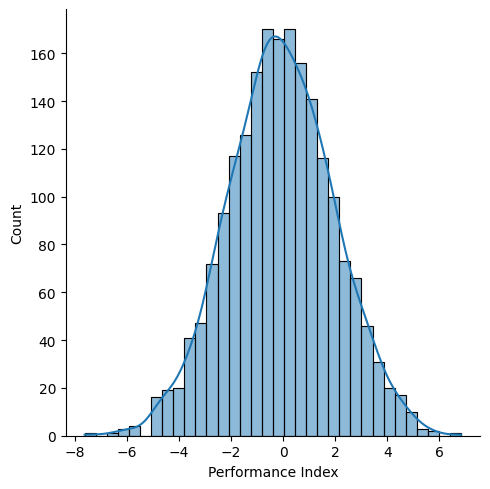

In [14]:
sns.displot(residuals, kde=True)

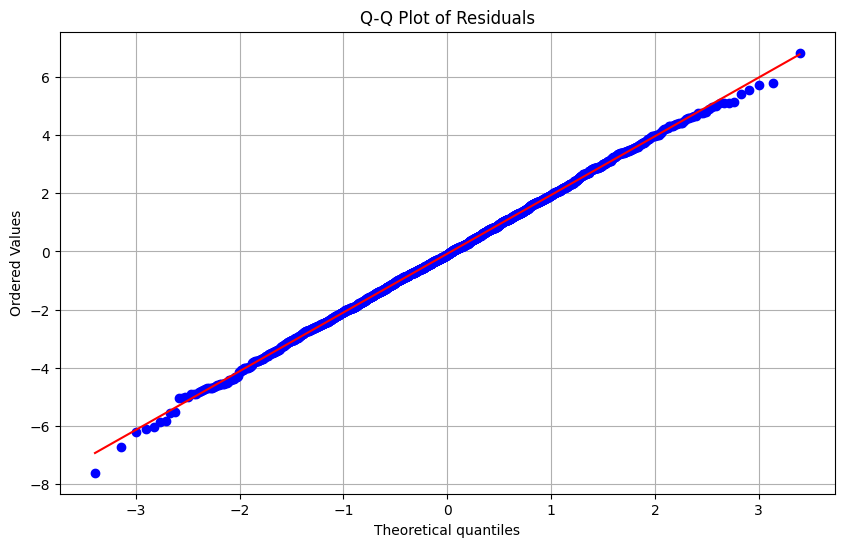

In [15]:
plt.figure(figsize=(10, 6))
sts.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

In [16]:
# Perform the Shapiro-Wilk test
stat, p_value = sts.shapiro(residuals)
print(f'Shapiro-Wilk Test statistic: {stat:.2f}')
print(f'p-value: {p_value:.2f}')

Shapiro-Wilk Test statistic: 1.00
p-value: 0.98


As we see, residuals are normaly distributed which means that the model captures the linear relationship between the independent featurs and the target variable accurately. The estimates of the model coefficients are unbiased. 

# Summary

In this analysis, the dependent variable "Performance" was examined. The residuals were found to follow a normal distribution, supported by a high p-value of 0.98. The model's performance was evaluated using a 10-fold cross-validation, yielding an average Mean Squared Error (MSE) of 4.15, indicating consistent accuracy across various data subsets. Moreover, the model achieved an impressive R² score of 0.99 on the test set, demonstrating its robust capability to explain the variability in "Performance Index". Overall, these findings affirm that the model performs exceptionally well in predicting the dependent variable with high accuracy and reliability.